<a href="https://colab.research.google.com/github/KettoMisaell/Analisis-Descriptivo/blob/main/PROYECTO_APLICACIONES_MOVILES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *APLICACIONES DE GOOGLE PLAY STORE; BREVE ANÁLISIS DESCRIPTIVO.*

Escogí un Dataset de Kaggle (https://www.kaggle.com/datasets/lava18/google-play-store-apps), en dónde se recopilan cerca de 10,000 aplicaciones distintintas de Google Play Store, con variables cómo el número de descargas, tamaño, rating, con algunas de las columnas que me parecen interesantes aplique conocimientos en estadística descriptiva, visualización y manipulación de datos, entre otras cosas, para obtener insights que me permitan llegar a conclusiones interesantes.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Lectura y revisión de los datos.**

Se leen los datos.

In [2]:
df = pd.read_csv('/content/googleplaystore.csv')

Se da una primera revisión para saber que columnas nos pueden ser útiles y tratar de imaginar que información útil se puede extraer.

In [ ]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


En mi caso, aunque estoy seguro que se puede extraer información valiosa con la mayoría de las columnas, para fines prácticos elegiré sólo algunas de ellas con las que haré relaciones útiles, para variables categóricas elegiré las columnas 'App' (muestra el nombre de aplicación), 'Category'(muestra la categoría o clasificación de la app), y 'Type' (la cuál sólo indica si la app es gratis o no). Para columnas numéricas elegiré 'Raiting', 'Reviews', 'Installs', y 'Price', las cuales indican la calificación dada por los usuarios en una escala del 1 al 5, el número de reviews que tiene, el número de instalaciones que tiene y el precio, respectivamente.

In [ ]:
df.columns  

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [3]:
df.drop(['Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size'], axis = 1, inplace = True)

Se convierten las variables que tienen que ser númericas al tipo 'float', para esto se borran los caracteres que impiden la conversión.

In [ ]:
df.dtypes

App          object
Category     object
Rating      float64
Reviews      object
Installs     object
Type         object
Price        object
dtype: object

In [4]:
df["Installs"] = df["Installs"].str.replace('+','')

<ipython-input-4-1669d4126041>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Installs"] = df["Installs"].str.replace('+','')


In [5]:
df["Installs"] = df["Installs"].str.replace(',','')

In [6]:
df["Price"] = df["Price"].str.replace('$','')

<ipython-input-6-f74a560dee16>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price"] = df["Price"].str.replace('$','')


In [ ]:
#Este error en el registro me aparece mas abajo y lo borro desde aca 
df[df['Installs'] == 'Free']

,App,Category,Rating,Reviews,Installs,Type,Price
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,Free,0,Everyone


In [7]:
df.drop(index = 10472, axis = 0, inplace = True)

In [8]:
df['Installs'] = df['Installs'].astype(float, errors = 'raise')
df['Price'] = df['Price'].astype(float, errors = 'raise')
df['Reviews'] = df['Reviews'].astype(float, errors = 'raise')

Notamos que las columnas ya están en el tipo de dato que corresponde

In [ ]:
df.dtypes

App          object
Category     object
Rating      float64
Reviews     float64
Installs    float64
Type         object
Price       float64
dtype: object

In [ ]:
df.head(10)

,App,Category,Rating,Reviews,Installs,Type,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000.0,Free,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,50000.0,Free,0.0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,50000.0,Free,0.0
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,1000000.0,Free,0.0
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,1000000.0,Free,0.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,10000.0,Free,0.0


# **Resumen**

In [ ]:
round(df.describe(), 2)

,Rating,Reviews,Installs,Price
count,9366.00,10840.0,1.084000e+04,10840.00
mean,4.19,444152.9,1.546434e+07,1.03
std,0.52,2927760.6,8.502936e+07,15.95
min,1.00,0.0,0.000000e+00,0.00
25%,4.00,38.0,1.000000e+03,0.00
50%,4.30,2094.0,1.000000e+05,0.00
75%,4.50,54775.5,5.000000e+06,0.00
max,5.00,78158306.0,1.000000e+09,400.00


La varibale que más llama mi atencion es el  'Rating', en la cuál existe una media de 4.19 de calificacion de usuario, una media bastante alta, incluso en el primer cuartil se encuentra un valor alto de 4, mientras que de la variable de instalaciones la aplicacion o aplicaciones con mayor numero de instalaciones superan los mil millones de instalaciones.

Se hace un conteno del numero y tipo de categoria, se aprecia que la mayoria de apps cae entre las categorias de 'Family', 'Game' y  'Tools'.

In [ ]:
df.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [ ]:
for i in range(len(df.Category.unique())):
  i += 1 
print(i)

33


En total existen 33 categorias distintas.

Se realiza un pairplot para saber si hay una especie de correlacion insteresante entre las variables numericas.

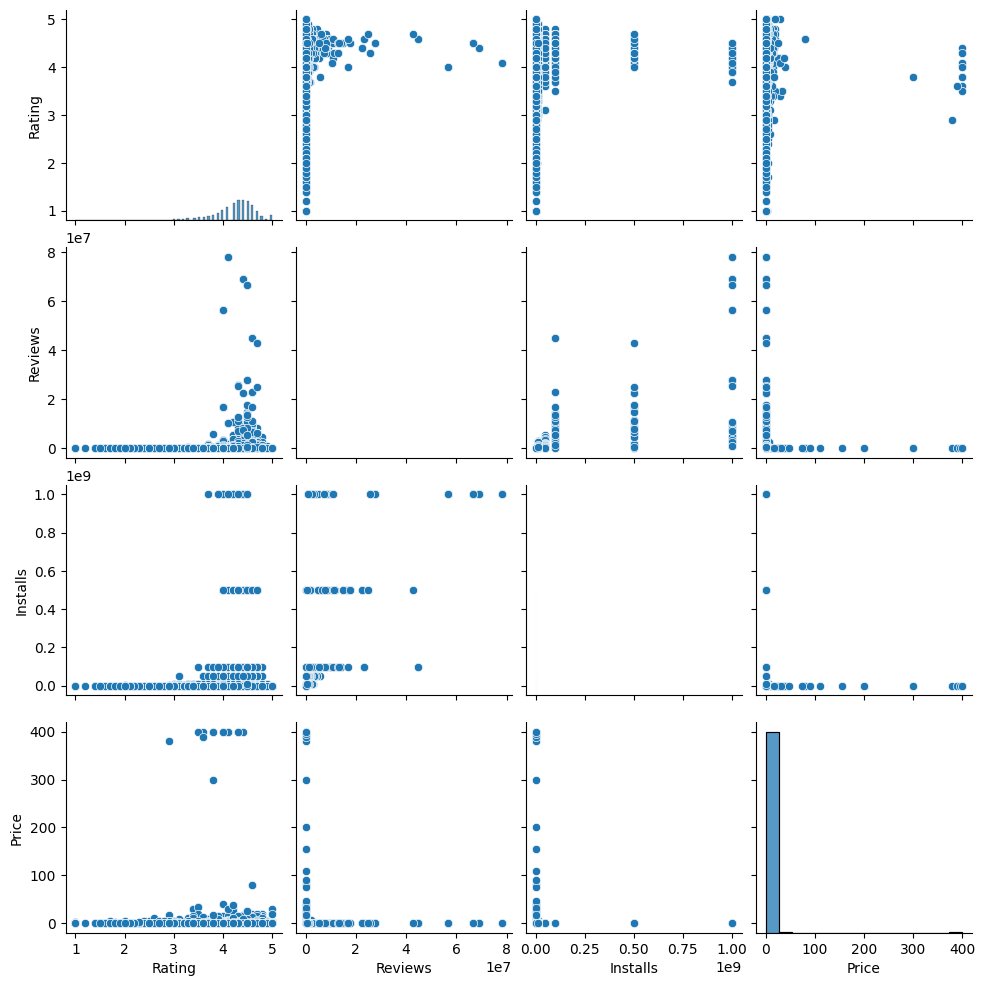

In [18]:
sns.pairplot(df)
plt.show()

Ninguna parece tener alguna correlación significativa.

A continuación se realiza una visualización de la distribución del rating dado por los usuarios.

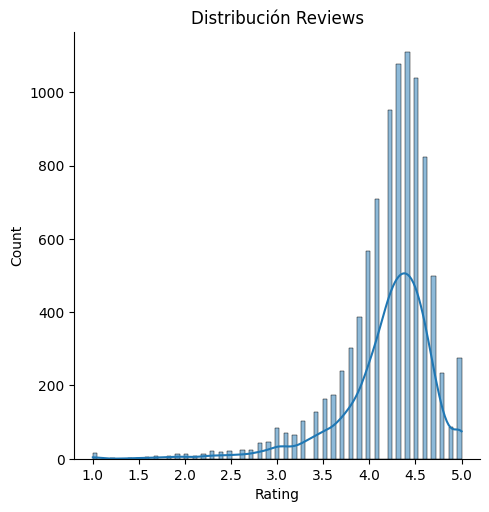

In [13]:
sns.displot(df['Rating'] , kde = True)
plt.title('Distribución Reviews')
plt.show()

Tal cómo se esperaba, la curva de distribución del Rating se encuentra concentrada hacia la derecha, cercana al valor máximo que es el 5.0.

In [ ]:
#Agrupación por categorías
cat = df.groupby(["Category"])['Installs'].sum().reset_index().sort_values('Installs',ascending = False).head(8)

Se agrupa por categorias y se suma el número de instalaciones y el Raiting para ver información significativa, al ser muchas categorías, escogí las 8 con mayor número de instalacciones.

In [ ]:
cat.Category.unique()

array(['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL', 'TOOLS',
       'FAMILY', 'PHOTOGRAPHY', 'NEWS_AND_MAGAZINES'], dtype=object)

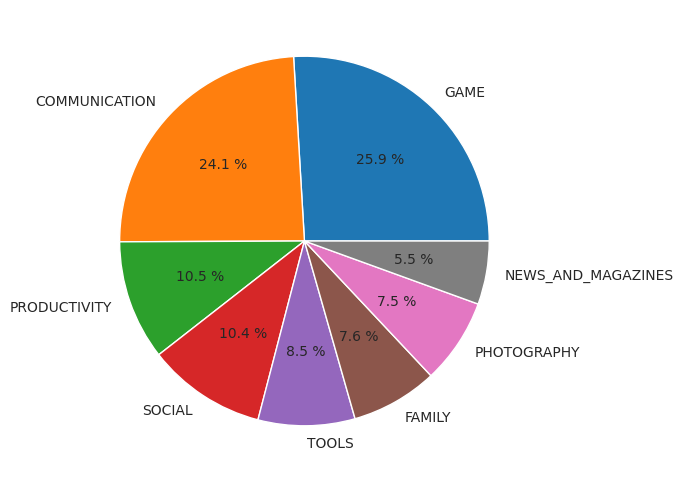

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(cat['Installs'], labels=  cat['Category'] , autopct="%0.1f %%")
plt.show()

Gráfico de pastel para las 8 categorias con más descargas.

In [ ]:
#Se obtiene una subtabla de con todas las variables para las 8 categorías elegidas anteriormente
categorias = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL', 'TOOLS', 'FAMILY', 'PHOTOGRAPHY']
df_grouped = df[df['Category'].isin(categorias)]

In [ ]:
df_grouped

,App,Category,Rating,Reviews,Installs,Type,Price
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,1.000000e+09,Free,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,1.000000e+09,Free,0.0
337,Messenger for SMS,COMMUNICATION,4.3,125257.0,1.000000e+07,Free,0.0
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,1.000000e+09,Free,0.0
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.4,1429035.0,1.000000e+08,Free,0.0
...,...,...,...,...,...,...,...
10827,Fr Agnel Ambarnath,FAMILY,4.2,117.0,5.000000e+03,Free,0.0
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881.0,1.000000e+05,Free,0.0
10834,FR Calculator,FAMILY,4.0,7.0,5.000000e+02,Free,0.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,5.000000e+03,Free,0.0


Echemos un vistazo rápido de las aplicaciones más descargadas.

In [ ]:
cat2 = df.sort_values(by = 'Installs', ascending = False)[['Category', 'Rating', 'Installs', 'App']].head(20)

In [ ]:
cat2

,Category,Rating,Installs,App
3896,GAME,4.5,1.000000e+09,Subway Surfers
3943,SOCIAL,4.1,1.000000e+09,Facebook
335,COMMUNICATION,4.0,1.000000e+09,Messenger – Text and Video Chat for Free
3523,PRODUCTIVITY,4.4,1.000000e+09,Google Drive
3565,PRODUCTIVITY,4.4,1.000000e+09,Google Drive
2884,PHOTOGRAPHY,4.5,1.000000e+09,Google Photos
3665,VIDEO_PLAYERS,4.3,1.000000e+09,YouTube
2853,PHOTOGRAPHY,4.5,1.000000e+09,Google Photos
4234,COMMUNICATION,4.1,1.000000e+09,Skype - free IM & video calls
3687,VIDEO_PLAYERS,3.7,1.000000e+09,Google Play Movies & TV


Se realiza un gráfico de caja de las categorías con más descargas en función de su rating.

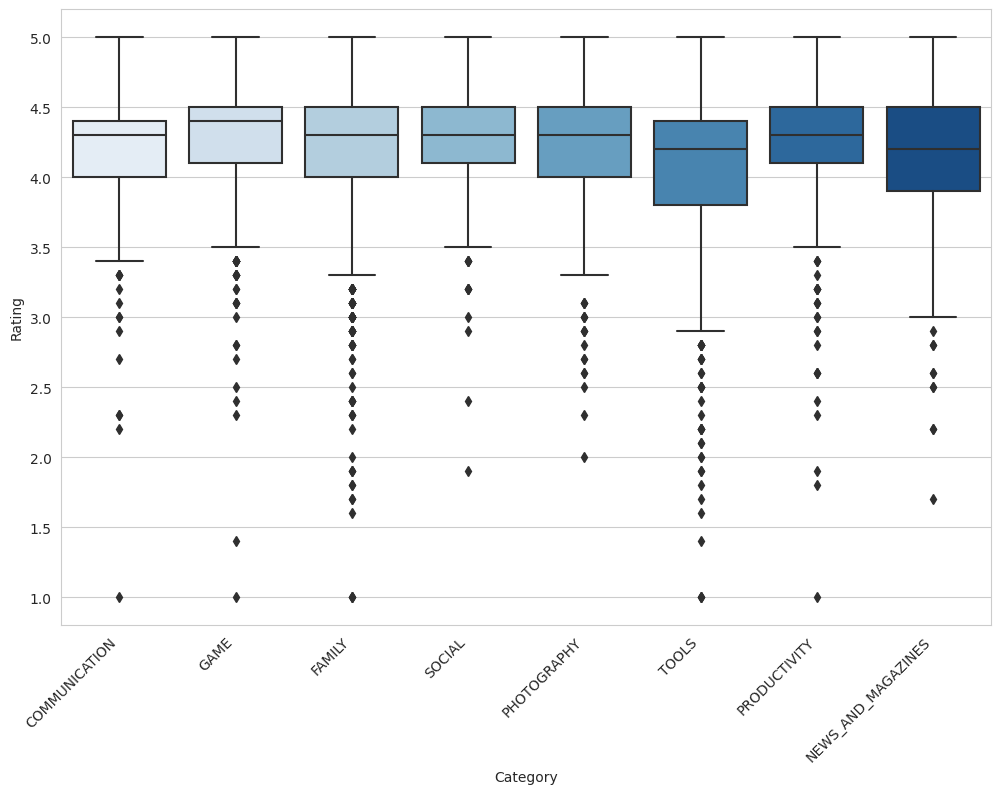

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Category', y='Rating', data= df_grouped, palette='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Al menos para las 8 categorías visualizadas, parece que la categoría de 'juegos' suele tener una media de puntuación por el usuario más alta, mientras que la de herramientas no sólo tiene una media de calificación más baja, sino que es la que muestra más 'outliers' con tendencia a calificaciones bajas, lo que resulta intuitivo ya que las aplicaciones utilizadas cómo herramientas se espera que nos resulten útiles y resuelvan un problema de manera muy eficaz, y al no hacerlo tal cuál se espera, se puede inferir que se dan calificaciones negativas para que el siguiente usuario no la útilice, pues la utilidad suele ser menos subjetiva.

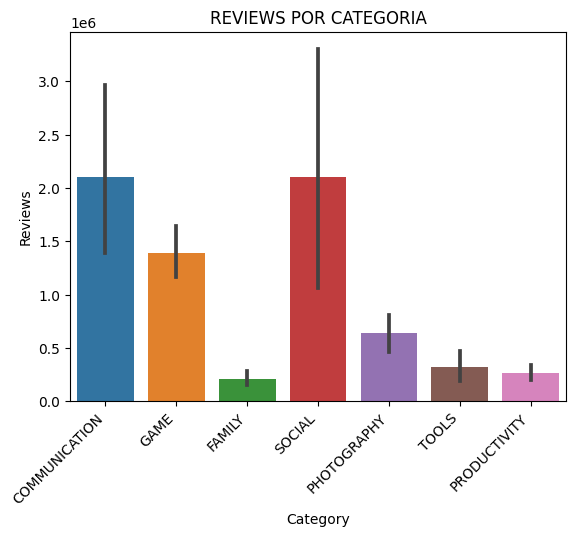

In [ ]:
ax = sns.barplot(data = df_grouped, x = 'Category', y = 'Reviews')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('REVIEWS POR CATEGORIA')
plt.show()

Finalmente se hace un gráfico de barras de los Reviews según el tipo de aplicación que es; una vez hecho se pueden dar algunas conclusiones interesantes:

Las aplicaciones sociales y de comunicación muestran una cantidad mucho mayor de Reviews por su naturaleza misma, estas aplicaciones suelen ser usadas para satisfacer el instinto natural de socializar, formar una comunidad, y sentirnos participativos e incluidos. Al sentir que no cumple su función o contrariamente (que la cumple adecuadamente), se suele avisar a otros para que se unan a la comunidad o que no lo hagan, es decir avisar sobre un espacio donde puede o no ser apto para crear circulos sociales.

# **Manejo de variables númericas**

Utilizaremos una transformación boxcox para ejemplificar la corrección de una distribución sesgada a una mejor comportada o más parecida a una gaussiana.

In [15]:
#Se llama al modulo boxcox 
from scipy.stats import boxcox

Se hará para la variable 'Rating' la cuál ya pudimos visualizar su distribución anteriormente.

In [16]:
# Transformamos los datos con Box-Cox
datos_transformados, lambda_optimo = boxcox(df.Rating)

# Imprimimos el lambda óptimo encontrado por Box-Cox
print("Lambda óptimo encontrado por Box-Cox:", lambda_optimo)

Lambda óptimo encontrado por Box-Cox: 8.472135811722177


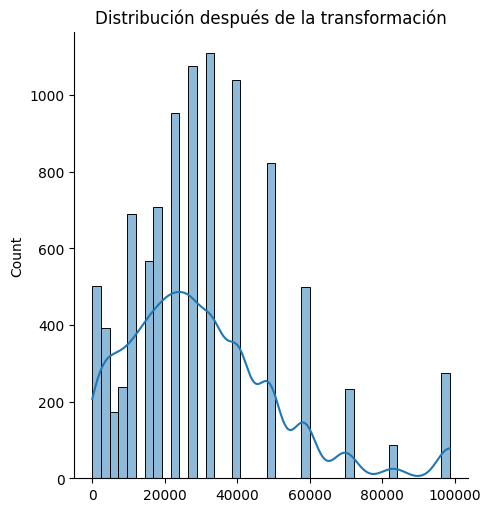

In [17]:
sns.displot(datos_transformados , kde = True)
plt.title('Distribución después de la transformación')
plt.show()

En este caso la transformación boxcox no me parece satisfactoria y encuentro la distribución original considerablemente mejor comportada.

# **Análisis de componenetes principales PCA**

Por último realizaré un análisis de componentes principales, donde reduciré mis 4 variables númericas a 2, las que contengan el mayor número de información, sin embargo, por la poca correlación que aparenta existir entre ellas, la perdida de información sea significativa.

In [19]:
#Se añaden mis columnas númericas a una lista
columnas_numericas = []
for columna in df.columns:
    if df[columna].dtype in ['int64', 'float64']:
        # Agrega la columna a la lista
        columnas_numericas.append(columna)

# Ahora la lista 'columnas_numericas' contiene los nombres de las columnas numéricas
print(columnas_numericas)

['Rating', 'Reviews', 'Installs', 'Price']


Se encuentran las variables con valores nulos, ya que más adelnate puede ser un problema.

In [23]:
import pandas as pd
columnas_con_nulos = df.columns[df.isnull().any()].tolist()

# Ahora la lista 'columnas_con_nulos' contiene los nombres de las columnas con datos nulos
print(columnas_con_nulos)

['Rating', 'Type']


Se rellenan los valores nulos con el promedio de mi variable númerica que ocuparé más adelante.

In [25]:
# Calcula el promedio de la columna
promedio = df['Rating'].mean()

# Rellena los valores nulos de la columna con el promedio
df['Rating'].fillna(promedio, inplace=True)

Se normalizan los datos.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(
    df[['Rating', 'Reviews', 'Installs', 'Price']]
)
scaled.T   #Normalizacion de los datos

array([[-1.91606481e-01, -6.09243507e-01,  1.06130460e+00, ...,
         1.85468097e-15,  6.43667571e-01,  6.43667571e-01],
       [-1.51656654e-01, -1.51380662e-01, -1.21819847e-01, ...,
        -1.51709939e-01, -1.51672025e-01, -1.56597540e-02],
       [-1.81761353e-01, -1.75998372e-01, -1.23073035e-01, ...,
        -1.81867204e-01, -1.81867204e-01, -6.42671056e-02],
       [-6.44159607e-02, -6.44159607e-02, -6.44159607e-02, ...,
        -6.44159607e-02, -6.44159607e-02, -6.44159607e-02]])

Echemos un vistazo a la matriz de covarianza.

In [27]:
covariance_matrix = np.cov(scaled.T)
covariance_matrix #Matriz de covarianza de los datos normalizados 

array([[ 1.00009226,  0.06802423,  0.05122551, -0.02019152],
       [ 0.06802423,  1.00009226,  0.6431814 , -0.00966816],
       [ 0.05122551,  0.6431814 ,  1.00009226, -0.01169055],
       [-0.02019152, -0.00966816, -0.01169055,  1.00009226]])

Ocuparemos el módulo PCA, para calcular los componentes principales.

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #PCA y su paramentro (se quiere reducir a dos componentes)
pca.fit(scaled) #Se ajusta a los datos escalados previamente

PCA(n_components=2)

In [29]:
pca.explained_variance_ratio_ 

array([0.41361633, 0.25330044])

Las dos variables con mayor representación representan cerca del 66% de la información, intentareos reducir a 3 en su lugar.

In [30]:
pca = PCA(n_components=3) #Se cambia el párametro 'n_components'
pca.fit(scaled)

PCA(n_components=3)

In [31]:
pca.explained_variance_ratio_ 

array([0.41361633, 0.25330044, 0.24392029])

Se observa que al menos ahora representa cerca del 90% de nuestra información, así que transformaremos los datos para reducirlos.

In [32]:
reduced_scaled = pca.transform(scaled) 